## Instruction

- Gain insights from dataset 
- Predict who got promotion in 2024
- which department is the most accomplished department based on promotion rates?

## Import Libraries + Data

In [89]:
import gdown
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.facecolor'] = '#FFEEC5'
plt.rcParams['axes.facecolor'] = '#FFEEC5'
colors = ['#FFB703', '#219EBC', 'lightgreen', '#FB8500', 'white', '#023047']

In [ ]:
train_file_id = '1W0LNE5T3Bz0-vyyJzF-RHV7mqF21n9Di'
train_download_url = f'https://drive.google.com/uc?id={train_file_id}'
gdown.download(train_download_url, 'train.csv', quiet=False)


test_file_id = '1RietL1w_6Yu_nHg4yzm8ZlDKR8hrF8M4'
test_download_url = f'https://drive.google.com/uc?id={test_file_id}'
gdown.download(test_download_url, 'test.csv', quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1W0LNE5T3Bz0-vyyJzF-RHV7mqF21n9Di
To: /content/train.csv
100%|██████████| 2.70M/2.70M [00:00<00:00, 18.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RietL1w_6Yu_nHg4yzm8ZlDKR8hrF8M4
To: /content/test.csv
100%|██████████| 963k/963k [00:00<00:00, 8.75MB/s]


'test.csv'

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,48048,Sales & Marketing,region_14,NaN,m,other,1,23,1.0,2,0,53,0
1,39657,Finance,region_29,Bachelor's,m,other,2,26,NaN,1,0,58,0
2,16937,Operations,region_22,Bachelor's,f,sourcing,2,29,NaN,1,0,62,0
3,69661,Analytics,region_4,Master's & above,m,other,1,32,4.0,5,0,84,0
4,11746,Sales & Marketing,region_26,Bachelor's,f,other,1,31,3.0,5,0,49,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40100 entries, 0 to 40099
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           40100 non-null  int64  
 1   department            40100 non-null  object 
 2   region                40100 non-null  object 
 3   education             38332 non-null  object 
 4   gender                40100 non-null  object 
 5   recruitment_channel   40100 non-null  object 
 6   no_of_trainings       40100 non-null  int64  
 7   age                   40100 non-null  int64  
 8   previous_year_rating  37076 non-null  float64
 9   length_of_service     40100 non-null  int64  
 10  awards_won?           40100 non-null  int64  
 11  avg_training_score    40100 non-null  int64  
 12  is_promoted           40100 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 4.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,40100.0,39217.938728,22591.119028,2.0,19703.5,39283.5,58768.0,78298.0
no_of_trainings,40100.0,1.255062,0.612944,1.0,1.0,1.0,1.0,10.0
age,40100.0,34.809501,7.665358,20.0,29.0,33.0,39.0,60.0
previous_year_rating,37076.0,3.326923,1.262097,1.0,3.0,3.0,4.0,5.0
length_of_service,40100.0,5.873965,4.278233,1.0,3.0,5.0,7.0,37.0
awards_won?,40100.0,0.023441,0.151303,0.0,0.0,0.0,0.0,1.0
avg_training_score,40100.0,63.408878,13.372079,39.0,51.0,60.0,76.0,99.0
is_promoted,40100.0,0.085711,0.279940,0.0,0.0,0.0,0.0,1.0


## EDA

Prepare for EDA

In [ ]:
#Drop
df.dropna(inplace=True)
df.drop(columns=['employee_id'], inplace=True)

#Transform
df['previous_year_rating'] = df['previous_year_rating'].astype(int)
df.region = df['region'].str.replace('region_','').astype(int)

In [ ]:
# for col in df.columns:
#     if 'id' not in col:
#       if df[col].dtype == int:
#           sns.histplot(df[col], discrete=True,color=colors[0])
#           plt.xticks(df[col].unique(), ha='right')
#       else:
#           sns.histplot(df[col], color=colors[0])
#           plt.xticks(rotation=45, ha='right')
#       plt.title(col.title().replace('_',' '))
#       plt.xlabel('')
#       plt.ylabel('')
#       plt.show()

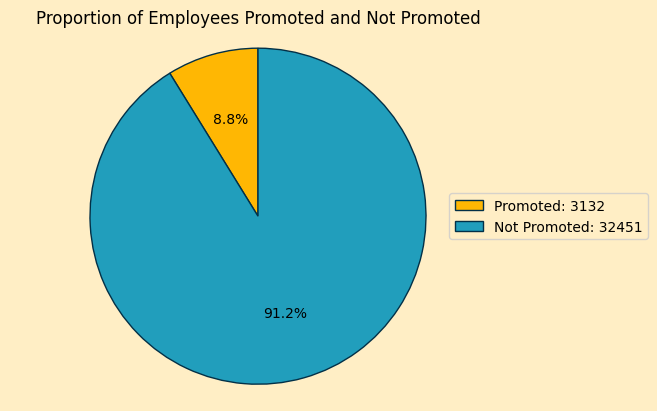

In [ ]:
promoted_count = df['is_promoted'].value_counts()[1]
not_promoted_count = df['is_promoted'].value_counts()[0]


labels = [f'Promoted: {promoted_count}', f'Not Promoted: {not_promoted_count}']
sizes = [promoted_count, not_promoted_count]


plt.pie(sizes, colors=colors, \
        autopct=lambda pct: '{:.1f}%'.format(pct), \
        startangle=90, wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})


plt.axis('equal')
plt.title('Proportion of Employees Promoted and Not Promoted')
plt.legend(labels, loc='center right', bbox_to_anchor=(1.3, .5))
plt.show()

By Department

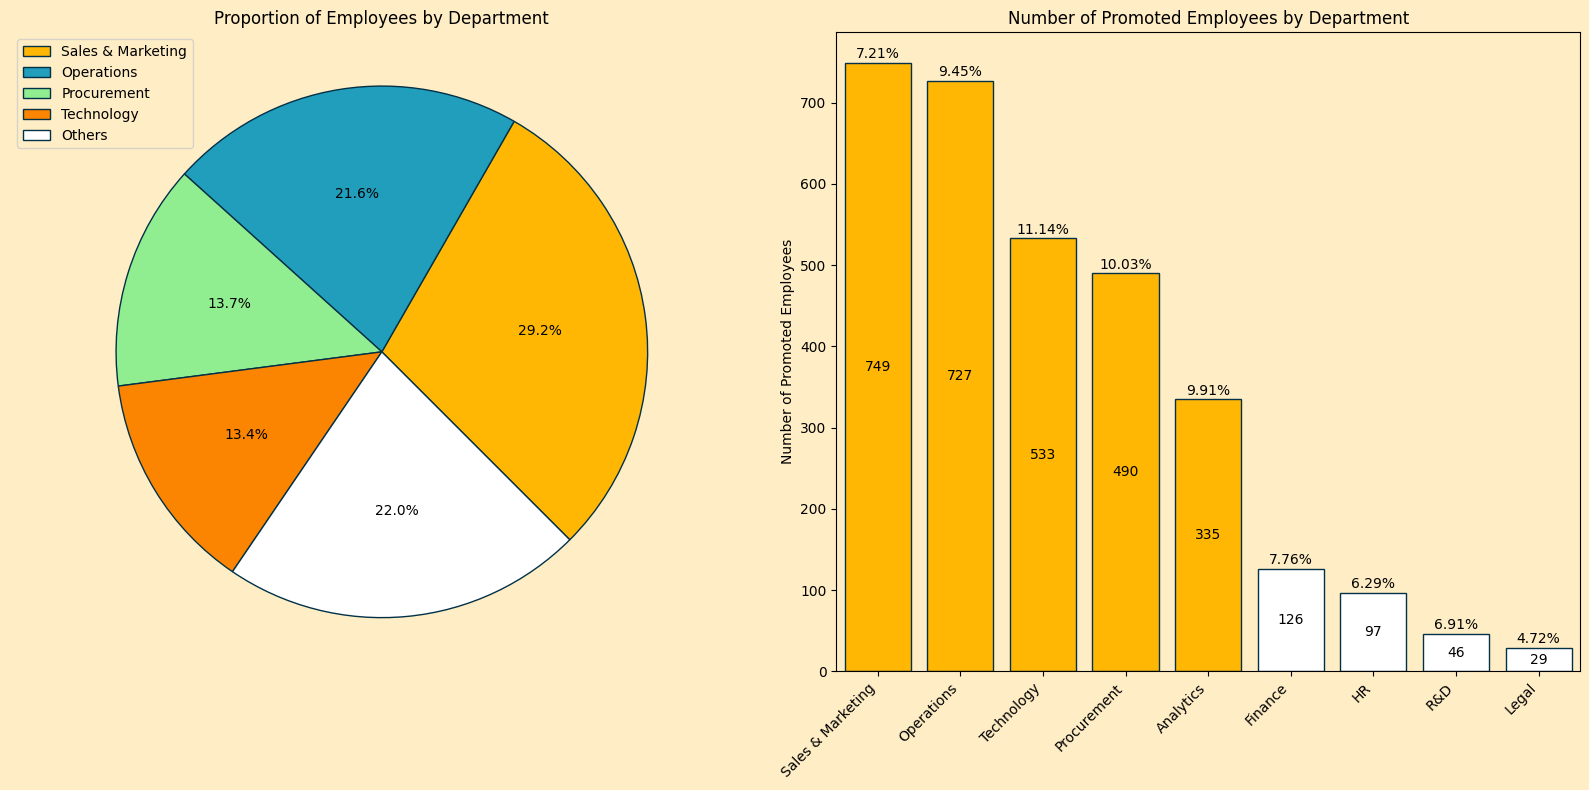

In [ ]:
# Calculate department counts and promotion percentages
promoted_counts = df[df['is_promoted'] == 1]['department'].value_counts()
department_counts = df['department'].value_counts()
percentage = (promoted_counts / department_counts * 100).round(2)
top5_departments = promoted_counts.sort_values(ascending=False).head(5)

# Calculate department proportions for pie chart
total_count = department_counts.sum()
department_proportions = department_counts / total_count
top4_departments = department_proportions.nlargest(4).index
top4_series = department_proportions[top4_departments]
other_proportion = department_proportions[~department_proportions.index.isin(top4_departments)].sum()
others_series = pd.Series({'Others': other_proportion})
proportions_to_plot = pd.concat([top4_series, others_series])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))


# Plot the pie chart
ax[0].pie(proportions_to_plot, colors=colors,
        autopct='%1.1f%%', startangle=-45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=proportions_to_plot.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Department')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Department')

for i, patch in enumerate(ax[1].patches):
    if promoted_counts.index[i] in top5_departments:
        patch.set_facecolor(colors[0])
    else:
        patch.set_facecolor(colors[-2])

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')


plt.tight_layout()
plt.show()

no_of_trainings          age          previous_year_rating  \
                              min mean max min mean max                  min   
department                                                                     
Analytics                       1    1   4  23   33  60                    1   
Finance                         1    1   5  20   33  60                    1   
HR                              1    1   3  20   35  60                    1   
Legal                           1    1   3  23   35  60                    1   
Operations                      1    1   5  20   37  60                    1   
Procurement                     1    1  10  20   37  60                    1   
R&D                             1    1   5  25   33  50                    1   
Sales & Marketing               1    1  10  20   36  60                    1   
Technology                      1    1   7  20   36  60                    1   

                           length_of_service          avg_training_score       \
                  mean max               min mean max                min mean   
department                                                                      
Analytics            4   5                 1    5  29                 75   85   
Finance              3   5                 1    5  33                 50   60   
HR                   3   5                 1    6  33                 40   50   
Legal                3   5                 1    5  23                 52   60   
Operations           4   5                 1    7  33                 50   60   
Procurement          3   5                 1    7  32                 60   70   
R&D                  4   5                 1    5  20                 77   85   
Sales & Marketing    3   5                 1    6  37                 39   50   
Technology           3   5                 1    6  33                 68   80   

                       
                  max  
department             
Analytics          99  
Finance            98  
HR                 97  
Legal              94  
Operations         99  
Procurement        99  
R&D                98  
Sales & Marketing  99  
Technology         99

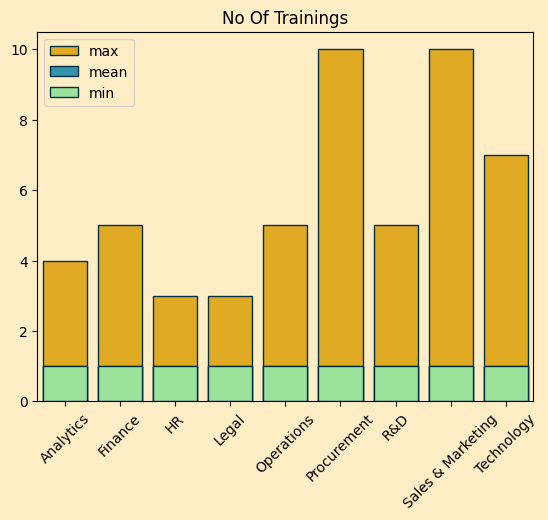

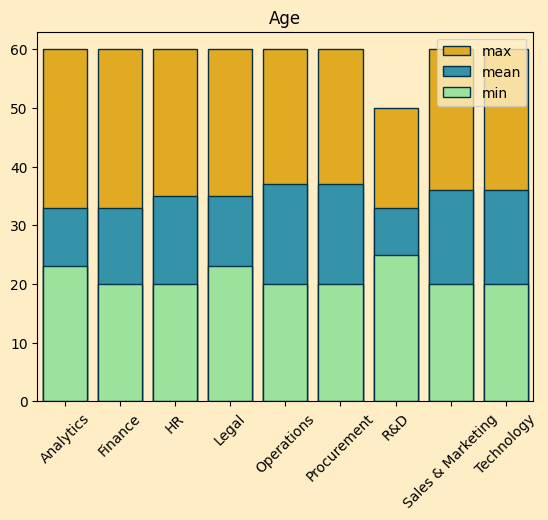

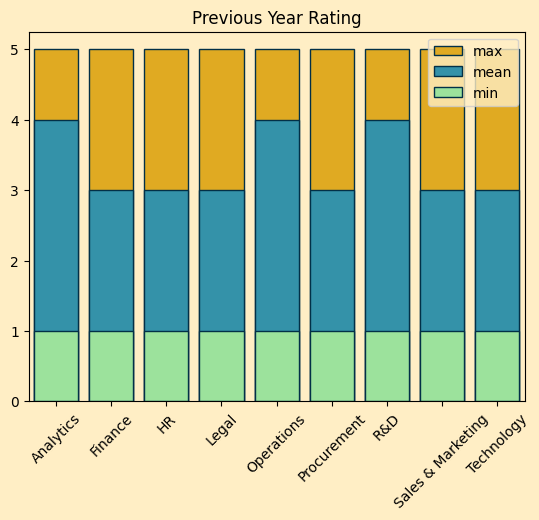

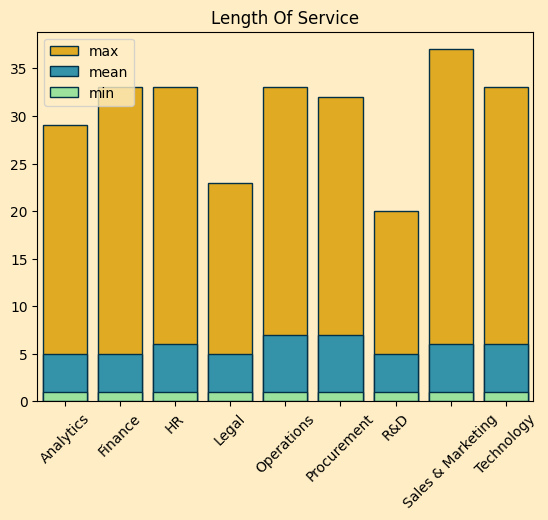

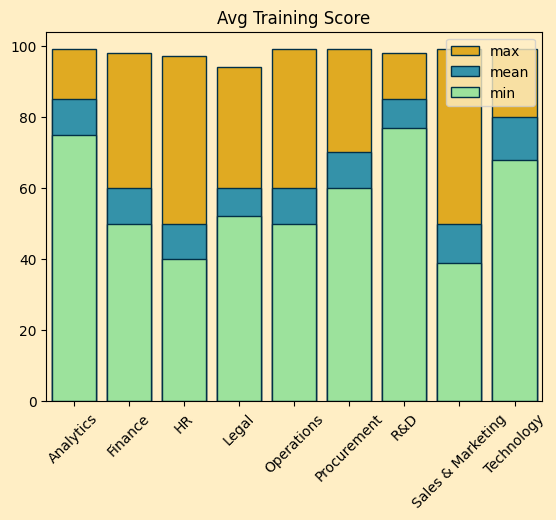

In [ ]:
col_for_department = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
department_df = df[['department']+['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']]
department_df = department_df.groupby('department').agg(['min','mean', 'max'])

for col in department_df.columns:
  if col[1] == 'mean':
    department_df[col] = department_df[col].round().astype(int)

display(department_df)

for col in col_for_department:
  plt.title(col.title().replace('_',' '))
  for i, stat in enumerate(['max','mean','min']):
    sns.barplot(department_df[col][stat], color=colors[i], edgecolor=colors[-1], label=stat)
  plt.xticks(rotation=45)
  plt.xlabel('')
  plt.ylabel('')
  plt.legend()
  plt.show()

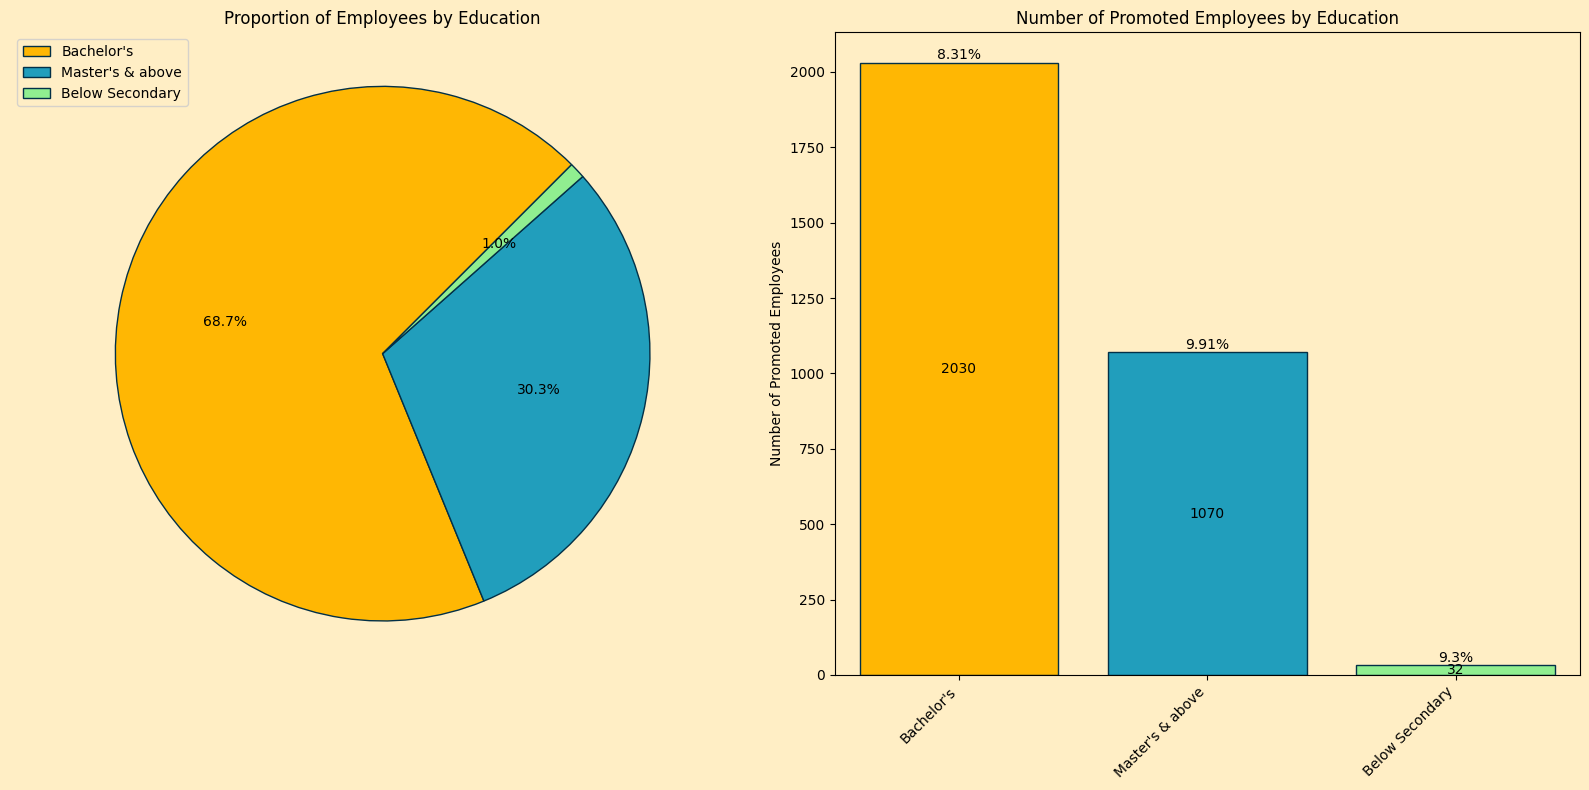

In [ ]:
promoted_counts = df[df['is_promoted'] == 1]['education'].value_counts()
education_counts = df['education'].value_counts()
percentage = (promoted_counts / education_counts * 100).round(2)

total_count = education_counts.sum()
education_proportions = education_counts / total_count


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(education_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=education_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Education')


sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Education')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

no_of_trainings          age          previous_year_rating  \
                             min mean max min mean max                  min   
education                                                                     
Bachelor's                     1    1  10  20   34  60                    1   
Below Secondary                1    1   4  20   24  31                    1   
Master's & above               1    1  10  20   39  60                    1   

                          length_of_service          avg_training_score       \
                 mean max               min mean max                min mean   
education                                                                      
Bachelor's          3   5                 1    6  37                 39   63   
Below Secondary     4   5                 1    2   5                 43   65   
Master's & above    3   5                 1    8  33                 41   64   

                      
                 max  
education             
Bachelor's        99  
Below Secondary   94  
Master's & above  99

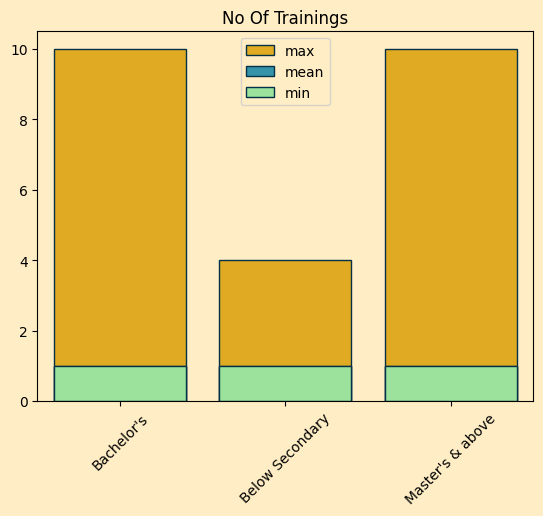

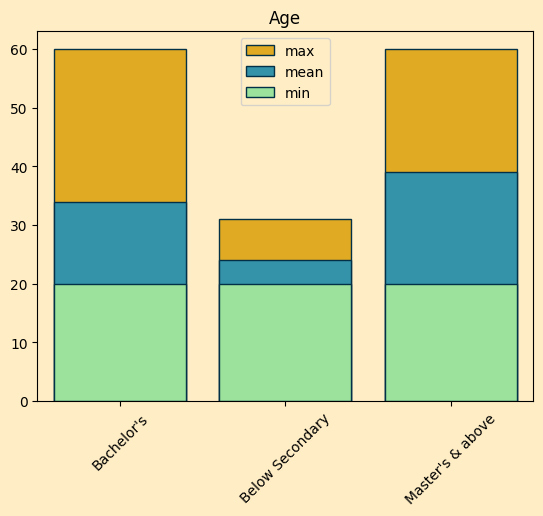

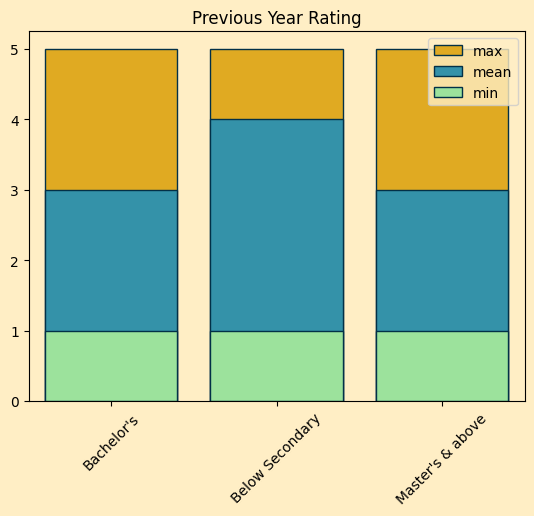

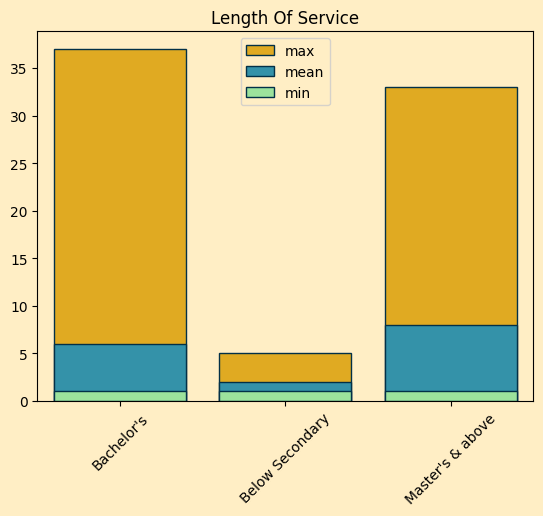

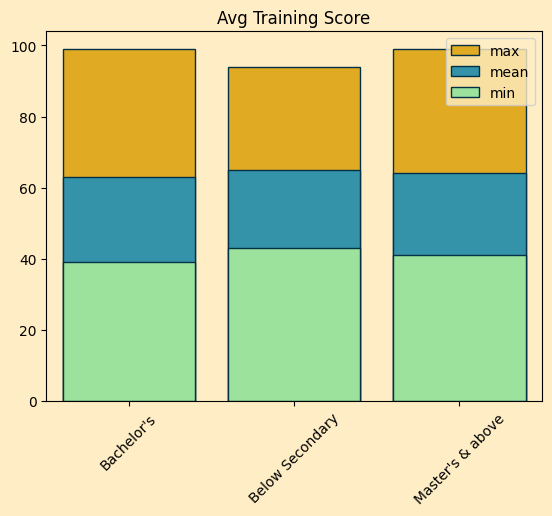

In [ ]:
col_for_education = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
education_df = df[['education']+['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']]
education_df = education_df.groupby('education').agg(['min','mean', 'max'])

for col in education_df.columns:
  if col[1] == 'mean':
    education_df[col] = education_df[col].round().astype(int)

display(education_df)

for col in col_for_education:
  plt.title(col.title().replace('_',' '))
  for i, stat in enumerate(['max','mean','min']):
    sns.barplot(education_df[col][stat], color=colors[i], edgecolor=colors[-1], label=stat)
  plt.xticks(rotation=45)
  plt.xlabel('')
  plt.ylabel('')
  plt.legend()
  plt.show()

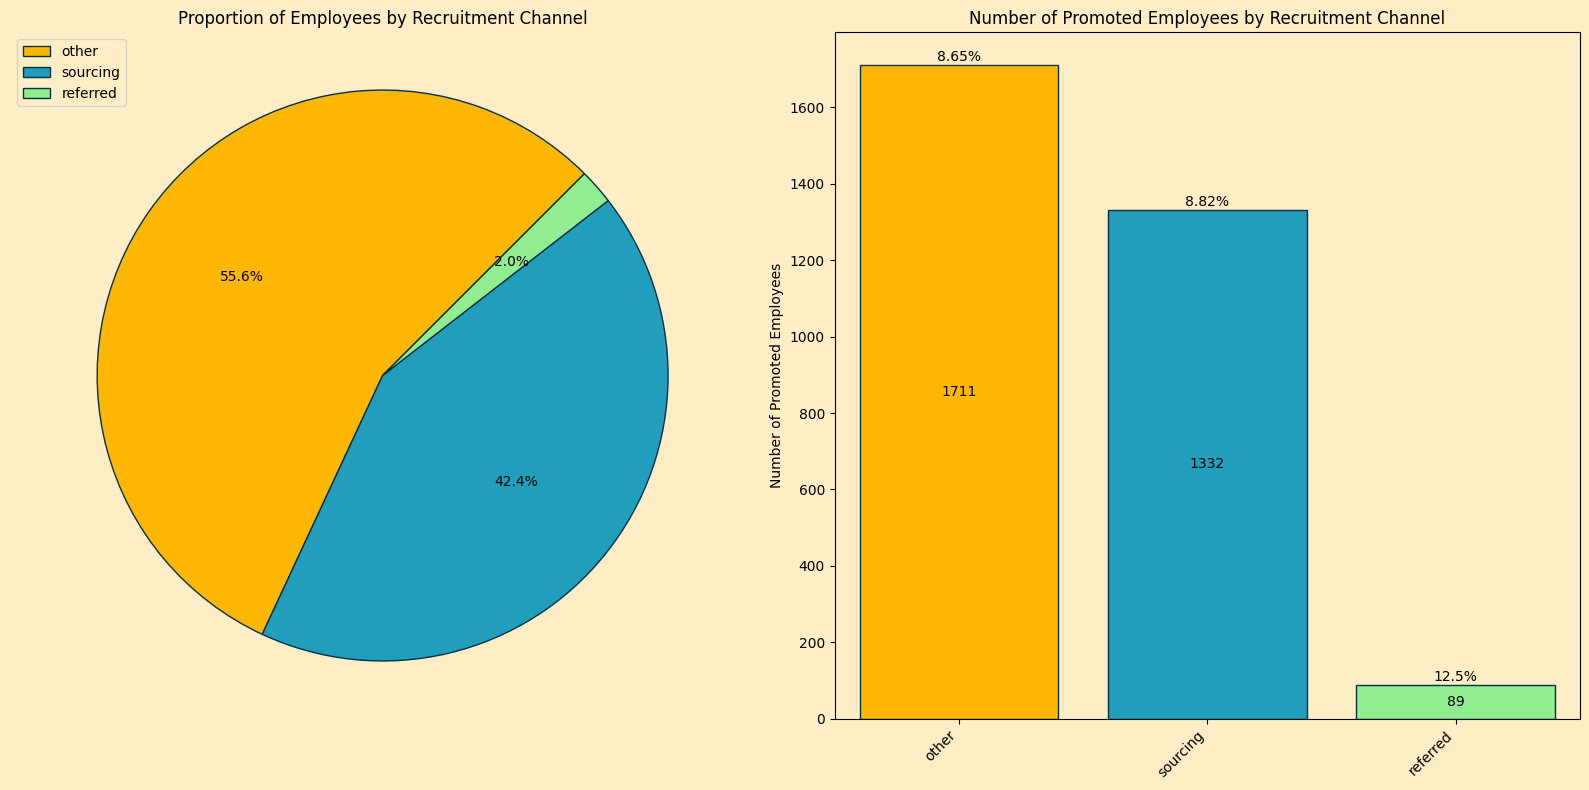

In [ ]:
promoted_counts = df[df['is_promoted'] == 1]['recruitment_channel'].value_counts()
recruitment_channel_counts = df['recruitment_channel'].value_counts()
percentage = (promoted_counts / recruitment_channel_counts * 100).round(2)


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart
total_count = recruitment_channel_counts.sum()
recruitment_channel_proportions = recruitment_channel_counts / total_count
ax[0].pie(recruitment_channel_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=recruitment_channel_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Recruitment Channel')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Recruitment Channel')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

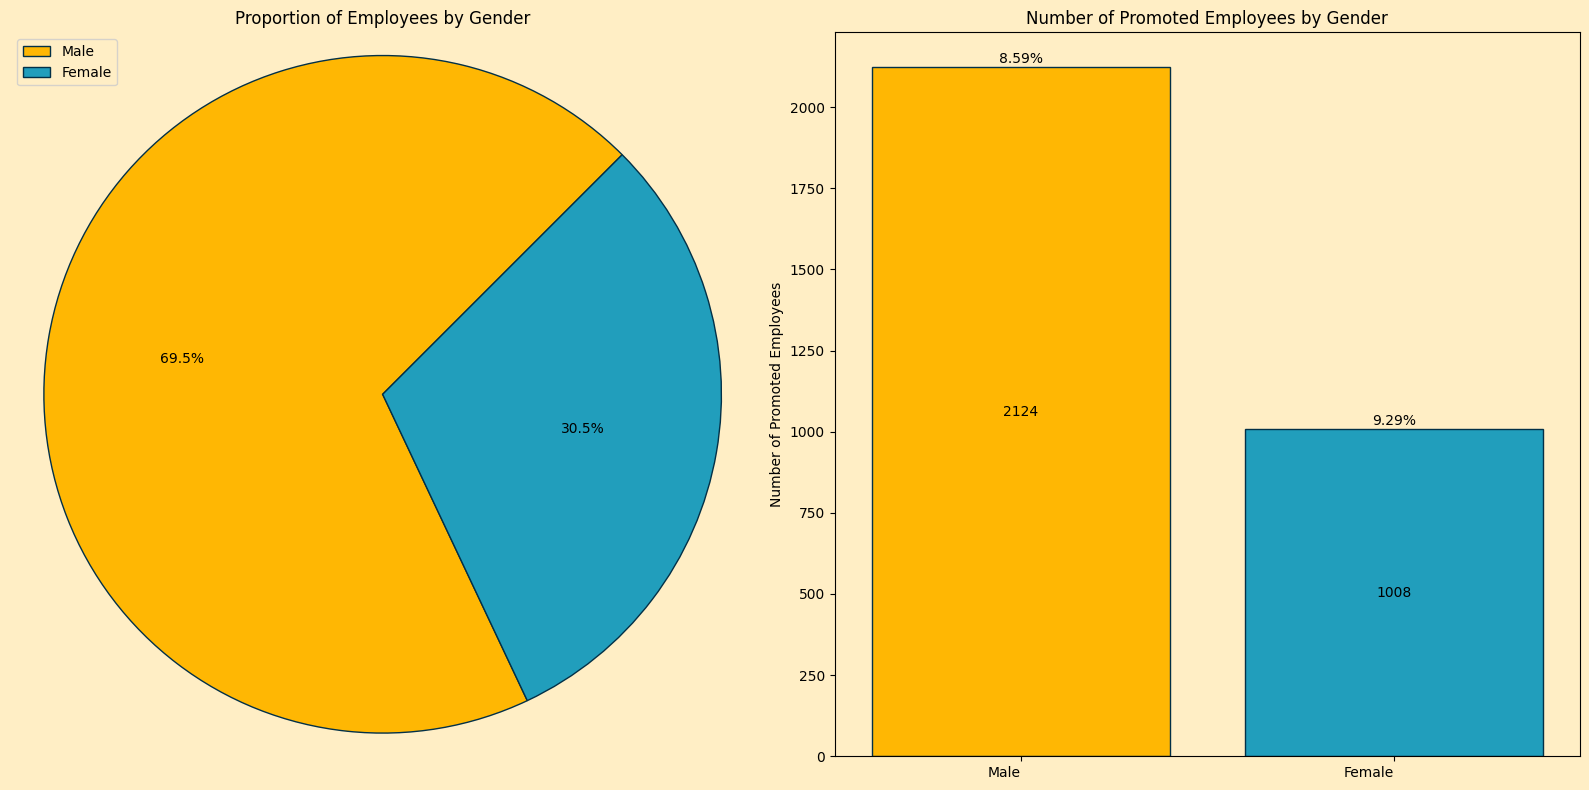

In [ ]:
# Calculate gender counts and promotion percentages
promoted_counts = df[df['is_promoted'] == 1]['gender'].value_counts().rename({'m':'Male', 'f':'Female'})
gender_counts = df['gender'].value_counts().rename({'m':'Male', 'f':'Female'})
percentage = (promoted_counts / gender_counts * 100).round(2)

# Calculate gender proportions for pie chart
total_count = gender_counts.sum()
gender_proportions = gender_counts / total_count


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart
ax[0].pie(gender_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=gender_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Gender')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Gender')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

## Preprocessing

In [ ]:
#1. Using Label Encoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

#2. Using One Hot Encoder
col_to_encode = ['region', 'recruitment_channel', 'education','department']
oh = OneHotEncoder(dtype=int)
encoded_oh = oh.fit_transform(df[col_to_encode]).toarray()
encoded_df = pd.DataFrame(encoded_oh, columns=oh.get_feature_names_out(col_to_encode))

for i, col in enumerate(oh.get_feature_names_out(col_to_encode)):
    df[col] = encoded_oh[:, i]

df.drop(columns=col_to_encode, axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35583 entries, 3 to 40099
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   gender                        35583 non-null  int64
 1   no_of_trainings               35583 non-null  int64
 2   age                           35583 non-null  int64
 3   previous_year_rating          35583 non-null  int64
 4   length_of_service             35583 non-null  int64
 5   awards_won?                   35583 non-null  int64
 6   avg_training_score            35583 non-null  int64
 7   is_promoted                   35583 non-null  int64
 8   region_1                      35583 non-null  int64
 9   region_2                      35583 non-null  int64
 10  region_3                      35583 non-null  int64
 11  region_4                      35583 non-null  int64
 12  region_5                      35583 non-null  int64
 13  region_6                      35583 

# Model: Classification

##Data Training

In [ ]:
def bordered_print(text, width=60, border_symbol='='):
    if len(text)//2 != 1:
        width += 1

    padding = (width - len(text)) // 2
    print(' ' + border_symbol * width)
    print('|' + ' ' * padding + text + ' ' * padding + '|')
    print(' ' + border_symbol * width)


def record_time(seconds):
    minutes = int(seconds // 60)
    remaining_seconds = seconds % 60
    if remaining_seconds < 1:
        remaining_seconds = round(remaining_seconds, 2)
    else:
        remaining_seconds = int(remaining_seconds)

    if minutes == 0:
        print(f'Time : {remaining_seconds}s')
        return remaining_seconds
    else:
        print(f'Time : {minutes}m {remaining_seconds}s')
        return minutes, remaining_seconds

In [ ]:
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)

In [ ]:
result = []
models = {'Logistic Regression':LogisticRegression(),
          'Decision Tree':DecisionTreeClassifier(),
          'Random Forest':RandomForestClassifier(),
          # 'SVM':SVC(),
          'XGBoost':XGBClassifier(),
          'LightGBM':LGBMClassifier()}

for model_name, model in models.items():
    bordered_print(f'{model_name}')
    print()
    model_results = {}


    #Without Resampling
    print('[ Without Resampling ]'.center(60))
    time_a = time.time()
    model_no_resampling = model.fit(X_train, y_train)
    y_pred_no_resampling = model_no_resampling.predict(X_test)
    time_b = time.time()

    roc_auc_no_resampling = roc_auc_score(y_test, y_pred_no_resampling)
    mse_no_resampling = mean_squared_error(y_test, y_pred_no_resampling)
    roc_auc_no_resampling = roc_auc_score(y_test, y_pred_no_resampling)
    model_results['no_resampling'] = {
        'model': model_no_resampling,
        'y_pred': y_pred_no_resampling,
        'mse': mse_no_resampling,
        'roc_auc': roc_auc_no_resampling,
        'time': time_b - time_a
    }

    record_time(time_b - time_a)
    print(f'MSE      : {mse_no_resampling}')
    print(f'ROC_AUC  : {roc_auc_no_resampling}\n')
    print(classification_report(y_test, y_pred_no_resampling))
    print()


    #Oversampling
    print('[ With Oversampling ]'.center(61))
    time_a = time.time()
    model_oversampling = model.fit(X_train_oversampling, y_train_oversampling)
    y_pred_oversampling = model_oversampling.predict(X_test)
    time_b = time.time()

    roc_auc_oversampling = roc_auc_score(y_test, y_pred_oversampling)
    mse_oversampling = mean_squared_error(y_test, y_pred_oversampling)
    roc_auc_oversampling = roc_auc_score(y_test, y_pred_oversampling)
    model_results['oversampling'] = {
        'model': model_oversampling,
        'y_pred': y_pred_oversampling,
        'mse': mse_oversampling,
        'roc_auc': roc_auc_oversampling,
        'time': time_b - time_a
    }

    record_time(time_b - time_a)
    print(f'MSE      : {mse_oversampling}')
    print(f'ROC_AUC  : {roc_auc_oversampling}\n')
    print(classification_report(y_test, y_pred_oversampling))
    print()

    result.append({model_name: model_results})


|                     Logistic Regression                     |

                   [ Without Resampling ]                   
Time : 0.49s
MSE      : 0.07067584656456372
ROC_AUC  : 0.6103091660261903

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6489
           1       0.90      0.22      0.36       628

    accuracy                           0.93      7117
   macro avg       0.92      0.61      0.66      7117
weighted avg       0.93      0.93      0.91      7117


                    [ With Oversampling ]                    
Time : 0.97s
MSE      : 0.12097794014331881
ROC_AUC  : 0.6524791342134116

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      6489
           1       0.34      0.38      0.36       628

    accuracy                           0.88      7117
   macro avg       0.64      0.65      0.64      7117
weighted avg       0.89      0.88      0.88      7117


|     

In [ ]:
best_model = None
best_roc_auc = 0
best_resampling = None

for model_result in result:
  for model_name, resampling_results in model_result.items():
    for resampling_type, metrics in resampling_results.items():
      if metrics['roc_auc'] > best_roc_auc:
        best_roc_auc = metrics['roc_auc']
        best_model = model_name
        best_resampling = resampling_type
        break

print(f'Best Model: {best_model} ({best_resampling}) with roc_auc: {best_roc_auc}')

Best Model: XGBoost (no_resampling) with roc_auc: 0.6800132365109794


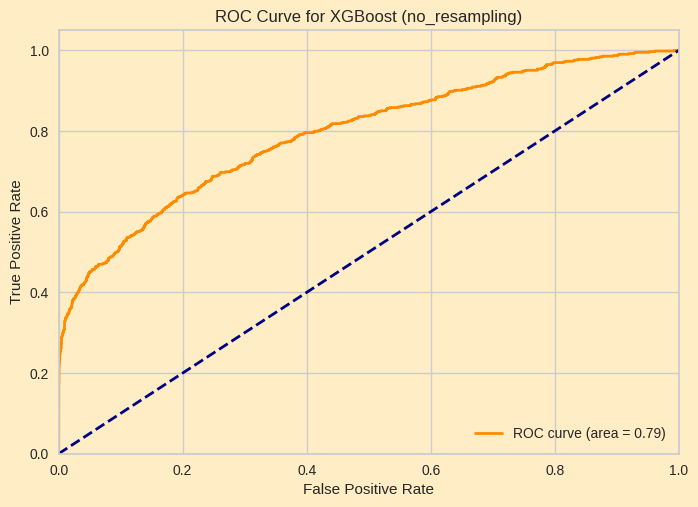

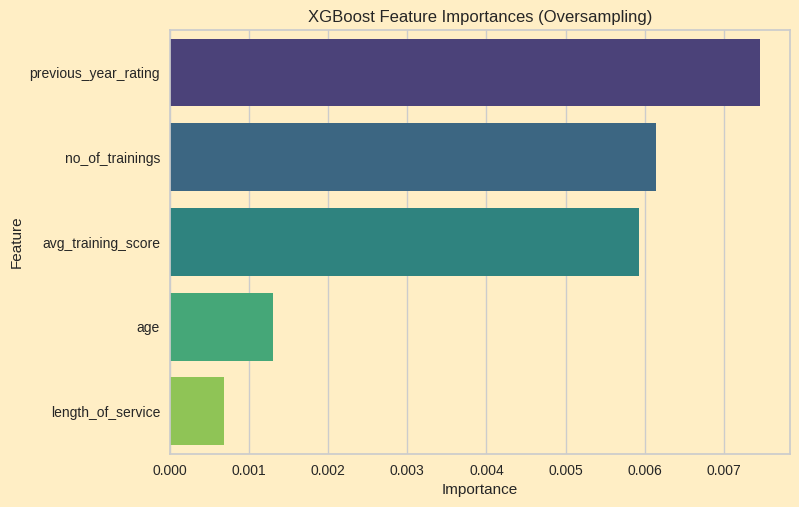

In [97]:

from sklearn.metrics import roc_curve, auc
for model_result in result:
    if best_model in model_result:
        best_model_results = model_result[best_model]
        best_model_data = best_model_results[best_resampling]
        y_pred_proba = best_model_data['model'].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        #ROC_AUC
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {best_model} ({best_resampling})')
        plt.legend(loc="lower right")
        plt.show()

        #Feature Importance
        importances = best_model_data['model'].feature_importances_

        feature_importances_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })

        numcol = ['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
        tempindex = [i for i,col in enumerate(X_train.columns) if col in numcol]
        tempdf = pd.DataFrame({'Feature':X_train.columns[tempindex], 'Importance':importances[tempindex]})
        tempdf = tempdf.sort_values(by='Importance', ascending=False)

        sns.barplot(x='Importance', y='Feature', data=tempdf, palette='viridis')
        plt.title('XGBoost Feature Importances (Oversampling)')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
        break

## Data Testing

In [ ]:
df_test = pd.read_csv('test.csv').drop(['employee_id'],axis=1)

df_test.dropna(inplace=True)
#Transform data
#1. Transform Manually
df_test['region'] = df_test['region'].str.replace('region_','').astype(int)

#2. Using Label Encoder
le = LabelEncoder()
df_test['gender'] = le.fit_transform(df_test['gender'])

#3. Using One Hot Encoder
col_to_encode = ['region','recruitment_channel', 'education','department']
oh = OneHotEncoder(dtype=int)
encoded_oh = oh.fit_transform(df_test[col_to_encode]).toarray()
encoded_df = pd.DataFrame(encoded_oh, columns=oh.get_feature_names_out(col_to_encode))

for i, col in enumerate(oh.get_feature_names_out(col_to_encode)):
  df_test[col] = encoded_oh[:, i]

df_test.drop(columns=col_to_encode, axis=1, inplace=True)

# df_test.info()

In [ ]:
for i, model_name in enumerate(models.keys()):
    if model_name == best_model:
      y_pred_test = result[i][model_name][best_resampling]['model'].predict(df_test)
      break

In [ ]:
df_test_predicted = pd.read_csv('test.csv')

df_test_predicted.dropna(inplace=True)
df_test_predicted['region'] = df_test_predicted['region'].str.replace('region_','').astype(int)

df_test_predicted['is_promoted'] = y_pred_test

In [ ]:
df_test_predicted.nunique()

,0
employee_id,13076
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,34


## Analysis After Predicting

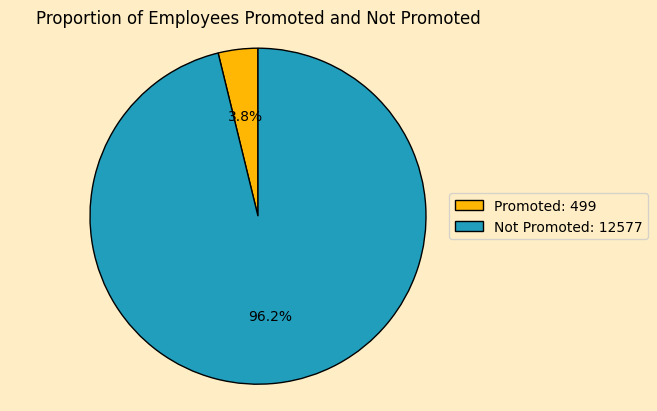

In [ ]:
promoted_count = df_test_predicted['is_promoted'].value_counts()[1]
not_promoted_count = df_test_predicted['is_promoted'].value_counts()[0]


labels = [f'Promoted: {promoted_count}', f'Not Promoted: {not_promoted_count}']
sizes = [promoted_count, not_promoted_count]


plt.pie(sizes, colors=colors, \
        autopct=lambda pct: '{:.1f}%'.format(pct), \
        startangle=90, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})


plt.axis('equal')
plt.title('Proportion of Employees Promoted and Not Promoted')
plt.legend(labels, loc='center right', bbox_to_anchor=(1.3, .5))
plt.show()

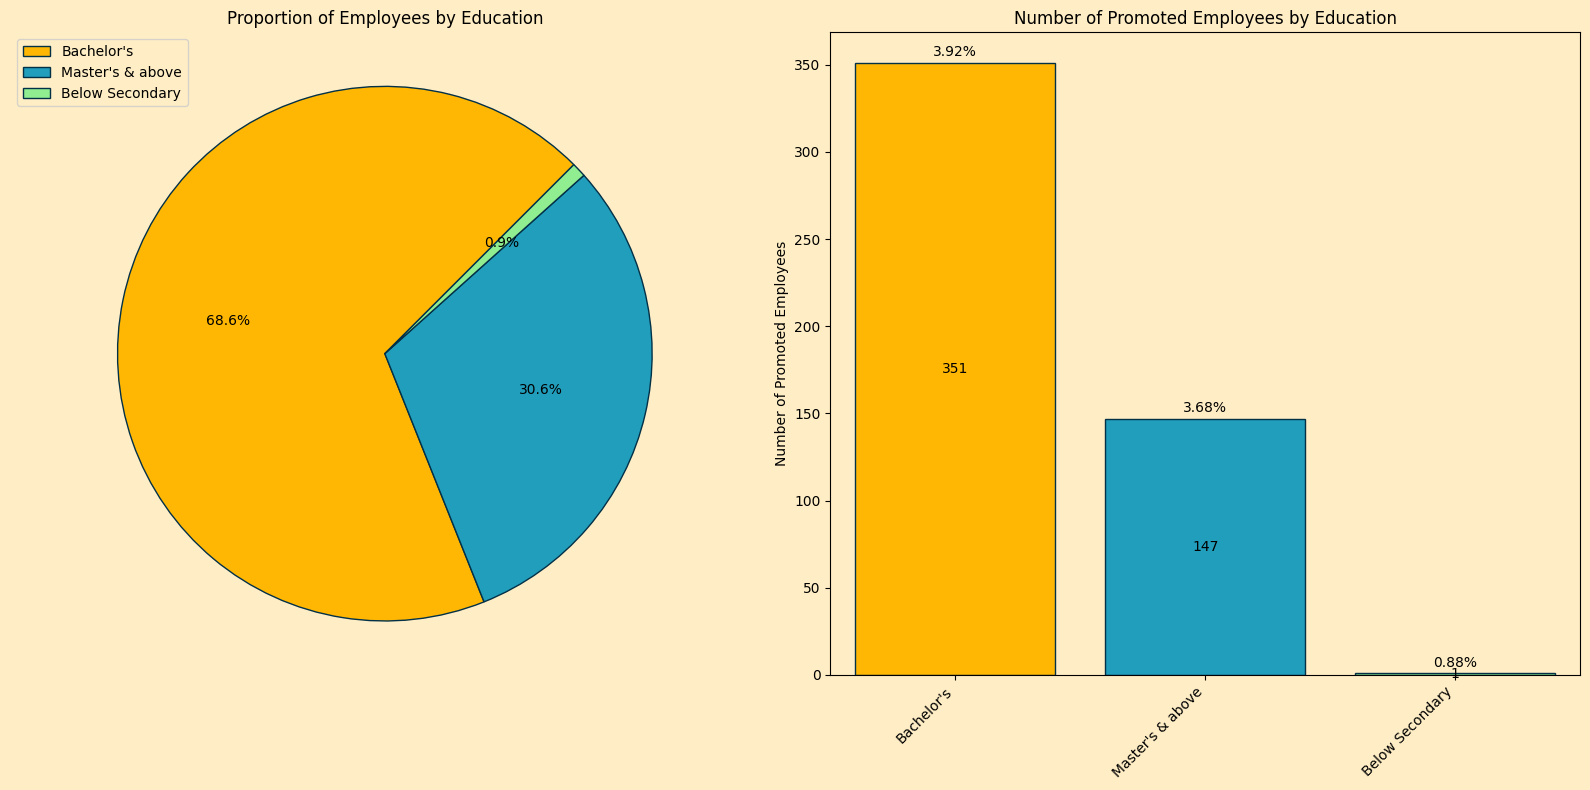

In [ ]:
promoted_counts = df_test_predicted[df_test_predicted['is_promoted'] == 1]['education'].value_counts()
education_counts = df_test_predicted['education'].value_counts()
percentage = (promoted_counts / education_counts * 100).round(2)

total_count = education_counts.sum()
education_proportions = education_counts / total_count


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].pie(education_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=education_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Education')


sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Education')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

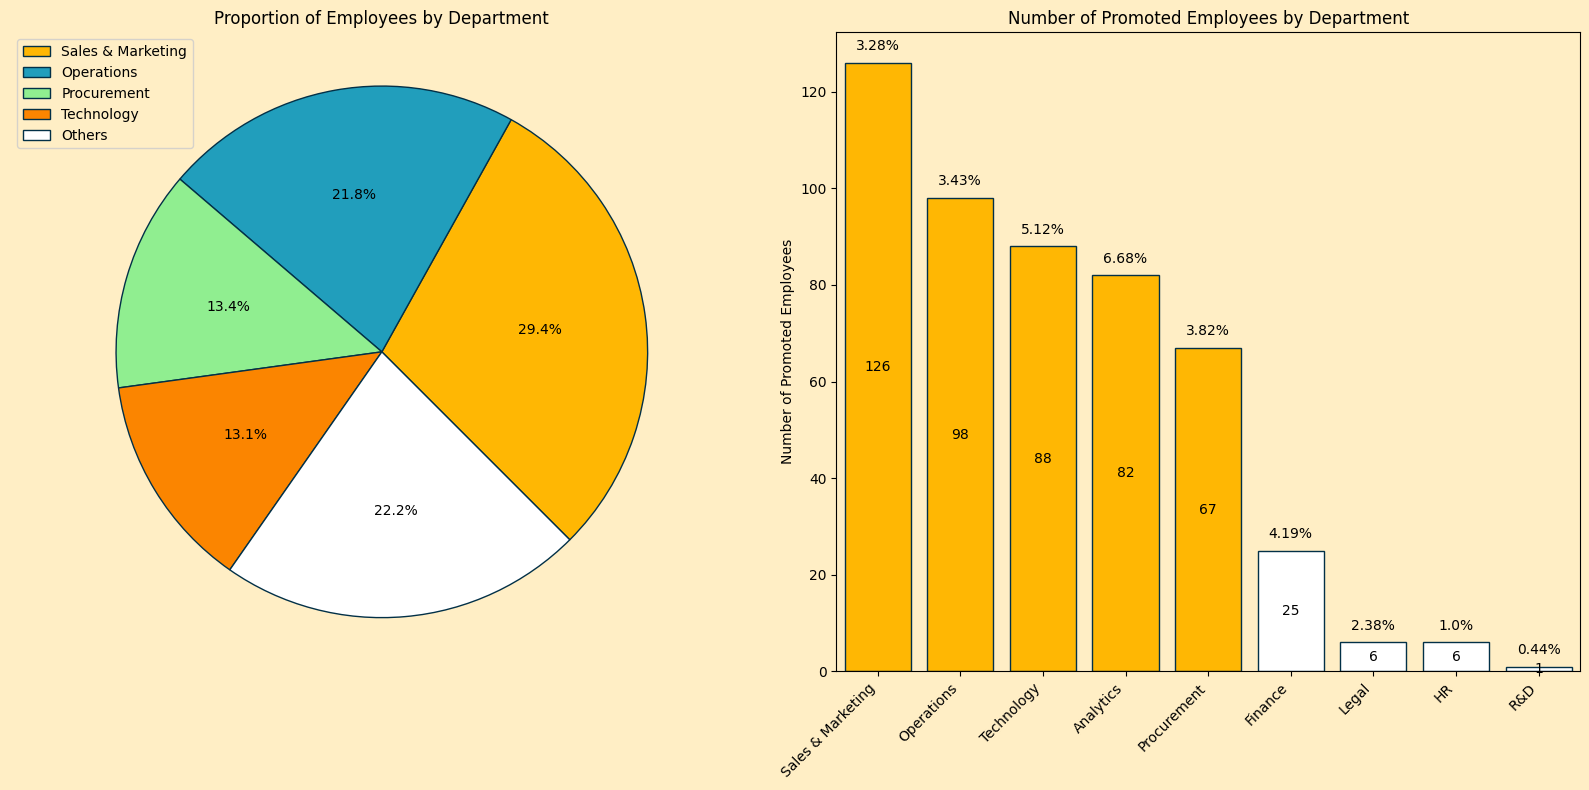

In [ ]:
# Calculate department counts and promotion percentages
promoted_counts = df_test_predicted[df_test_predicted['is_promoted'] == 1]['department'].value_counts()
department_counts = df_test_predicted['department'].value_counts()
percentage = (promoted_counts / department_counts * 100).round(2)
top5_departments = promoted_counts.sort_values(ascending=False).head(5)

# Calculate department proportions for pie chart
total_count = department_counts.sum()
department_proportions = department_counts / total_count
top4_departments = department_proportions.nlargest(4).index
top4_series = department_proportions[top4_departments]
other_proportion = department_proportions[~department_proportions.index.isin(top4_departments)].sum()
others_series = pd.Series({'Others': other_proportion})
proportions_to_plot = pd.concat([top4_series, others_series])

fig, ax = plt.subplots(1, 2, figsize=(16, 8))


# Plot the pie chart
ax[0].pie(proportions_to_plot, colors=colors,
        autopct='%1.1f%%', startangle=-45,
        wedgeprops={"edgecolor":colors[-1],'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=proportions_to_plot.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Department')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor=colors[-1], linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Department')

for i, patch in enumerate(ax[1].patches):
    if promoted_counts.index[i] in top5_departments:
        patch.set_facecolor(colors[0])
    else:
        patch.set_facecolor(colors[-2])

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center')
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom')


plt.tight_layout()
plt.show()

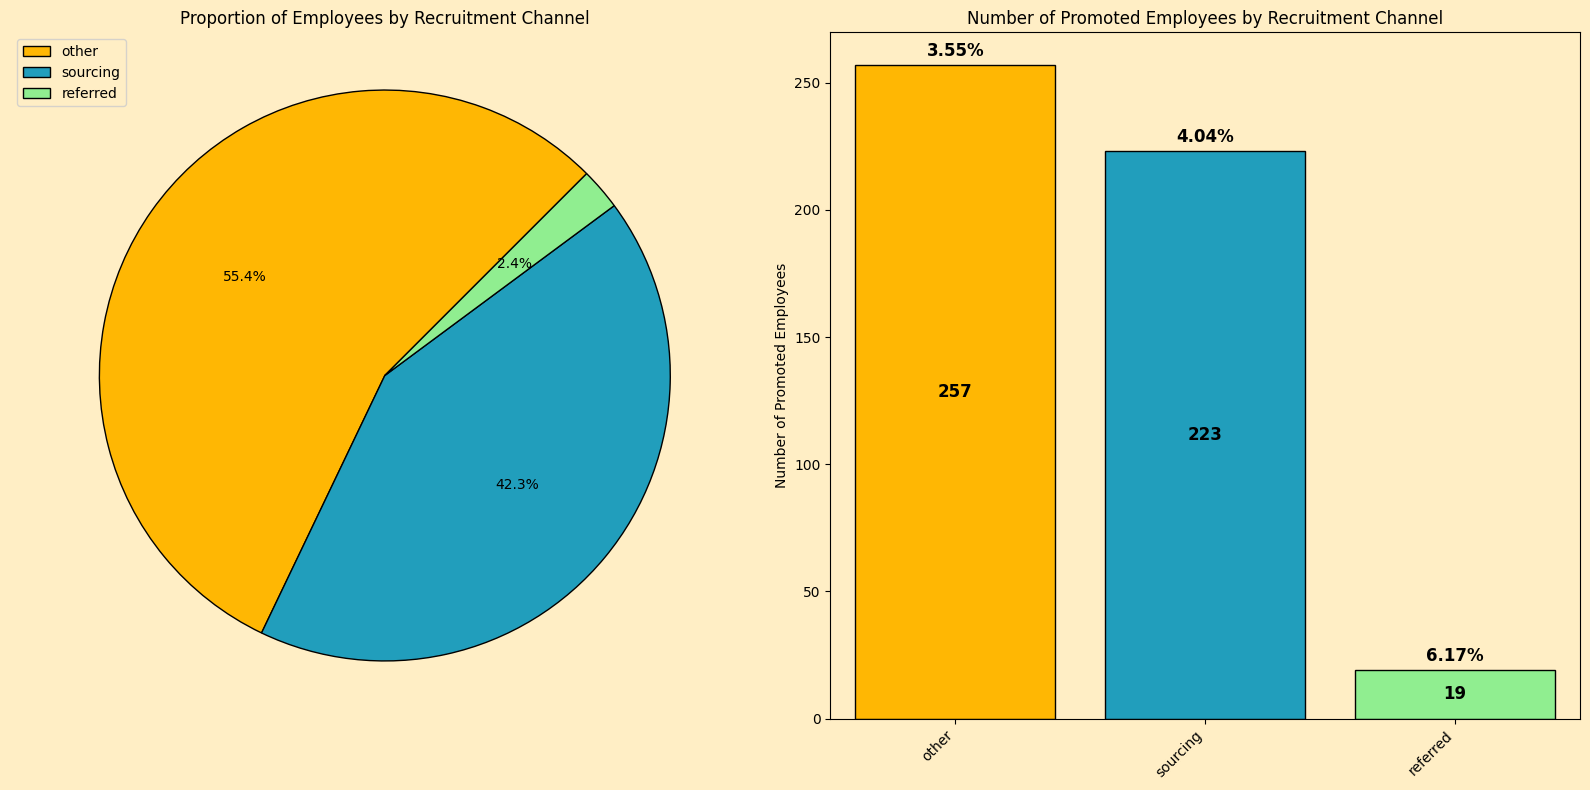

In [ ]:
promoted_counts = df_test_predicted[df_test_predicted['is_promoted'] == 1]['recruitment_channel'].value_counts()
recruitment_channel_counts = df_test_predicted['recruitment_channel'].value_counts()
percentage = (promoted_counts / recruitment_channel_counts * 100).round(2)


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart
total_count = recruitment_channel_counts.sum()
recruitment_channel_proportions = recruitment_channel_counts / total_count
ax[0].pie(recruitment_channel_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=recruitment_channel_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Recruitment Channel')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor='k', linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Recruitment Channel')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center', fontweight='bold', fontsize=12)
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom', fontweight='bold', fontsize=12)

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

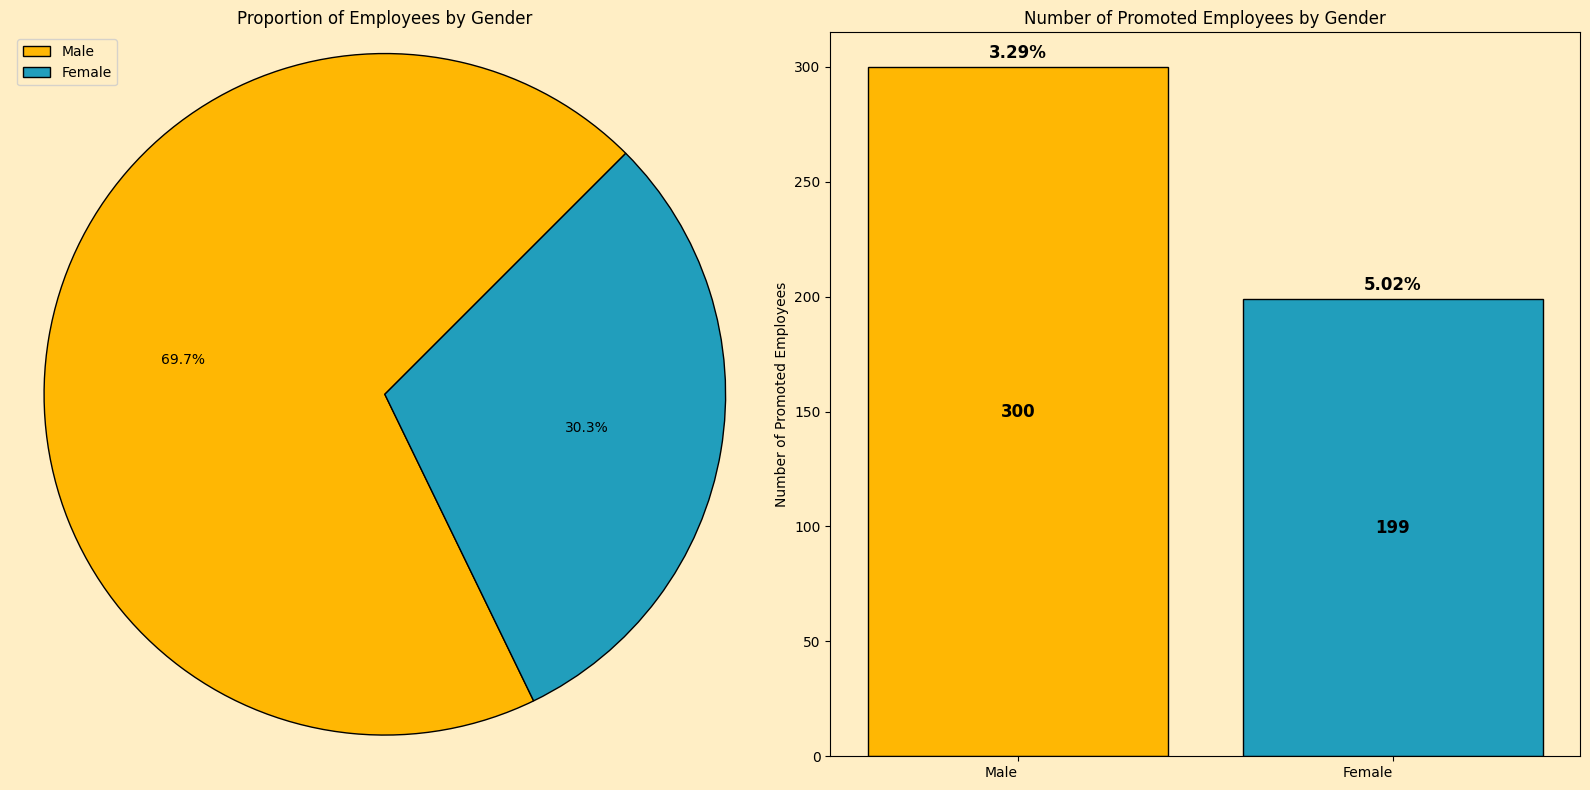

In [ ]:
# Calculate gender counts and promotion percentages
promoted_counts = df_test_predicted[df_test_predicted['is_promoted'] == 1]['gender'].value_counts().rename({'m':'Male', 'f':'Female'})
gender_counts = df_test_predicted['gender'].value_counts().rename({'m':'Male', 'f':'Female'})
percentage = (promoted_counts / gender_counts * 100).round(2)

# Calculate gender proportions for pie chart
total_count = gender_counts.sum()
gender_proportions = gender_counts / total_count


fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart
ax[0].pie(gender_proportions, colors=colors,
        autopct='%1.1f%%', startangle=45,
        wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True})
ax[0].axis('equal')
ax[0].legend(labels=gender_proportions.index, loc='upper left')
ax[0].set_title('Proportion of Employees by Gender')


# Plot the bar chart
sns.barplot(x=promoted_counts.index, y=promoted_counts.values, edgecolor='k', linewidth=1, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), ha='right')
ax[1].set_xlabel('')
ax[1].set_ylabel('Number of Promoted Employees')
ax[1].set_title('Number of Promoted Employees by Gender')

for i, v in enumerate(promoted_counts.values):
    ax[1].text(i, v / 2, str(v), ha='center', va='center', fontweight='bold', fontsize=12)
    ax[1].text(i, v + 2, f"{percentage[promoted_counts.index[i]]}%", ha='center', va='bottom', fontweight='bold', fontsize=12)

for i, patch in enumerate(ax[1].patches):
    patch.set_facecolor(colors[i])

plt.tight_layout()
plt.show()

#Model: Clustering

In [98]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [99]:
col_to_cluster =['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score','is_promoted']
df_cluster = df_test_predicted[col_to_cluster]

XX = df_cluster.values

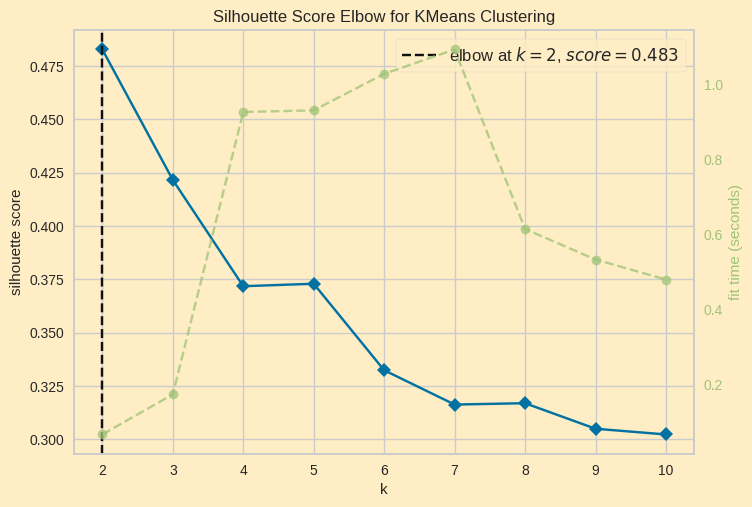

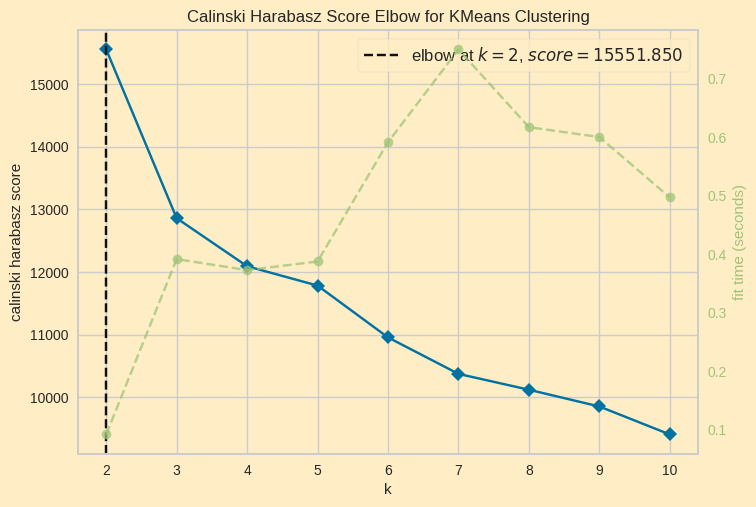

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [100]:
visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='silhouette', timings=True, colors=colors)
visualizer.fit(XX)
visualizer.fig.set_facecolor('#FFEEC5')
visualizer.ax.set_facecolor('#FFEEC5')
visualizer.show()

visualizer = KElbowVisualizer(kmeans, k=(2,11), metric='calinski_harabasz', timings=True, colors=colors)
visualizer.fit(XX)
visualizer.fig.set_facecolor('#FFEEC5')
visualizer.ax.set_facecolor('#FFEEC5')
visualizer.show()

In [101]:
kmeans = KMeans(n_clusters=2, random_state=42)
label = kmeans.fit_predict(XX)

df_cluster['cluster_index'] = label

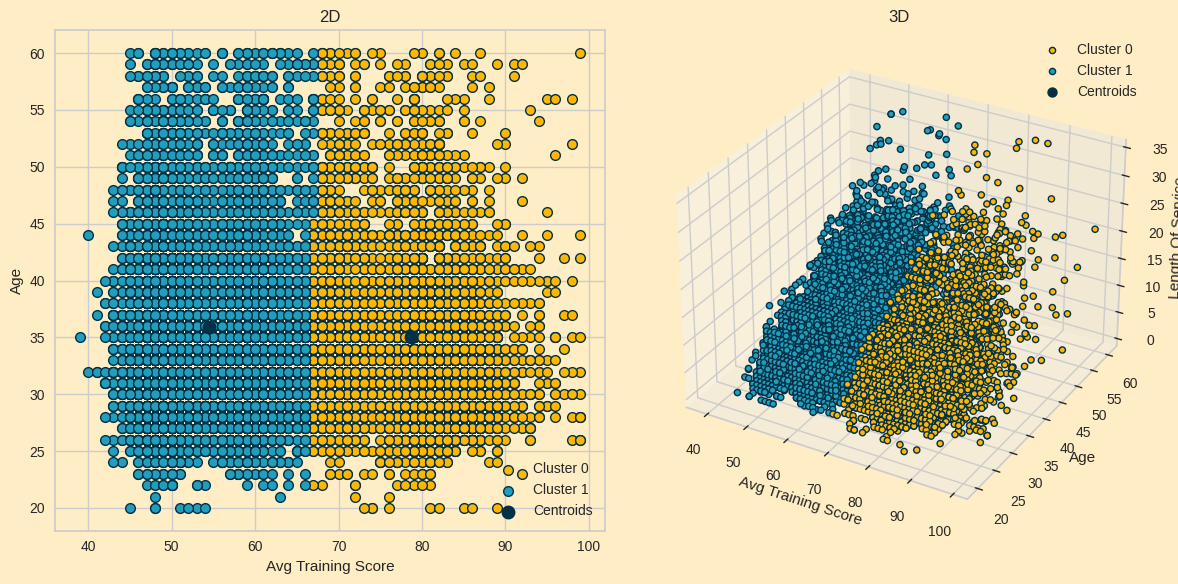

In [102]:
# col_to_cluster =['no_of_trainings','age','previous_year_rating','length_of_service','awards_won?','avg_training_score','is_promoted']
x_feature = 5
y_feature = 1
z_feature = 3

centroids = kmeans.cluster_centers_

# Create subplots
fig = plt.figure(figsize=(12, 6))
fig.set_facecolor('#FFEEC5')

# 2D Scatter Plot
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, 1st subplot
for i in np.unique(label):
    ax1.scatter(XX[label == i, x_feature], XX[label == i, y_feature], label=f'Cluster {i}', color=colors[i], edgecolors=colors[-1], linewidths=1, alpha=1)
ax1.scatter(centroids[:, x_feature], centroids[:, y_feature], linewidths=3, color=colors[-1], label='Centroids')
ax1.set_xlabel(col_to_cluster[x_feature].title().replace('_',' '))
ax1.set_ylabel(col_to_cluster[y_feature].title().replace('_',' '))
ax1.set_title('2D')
ax1.set_facecolor('#FFEEC5')
ax1.legend()

# 3D Scatter Plot
ax2 = fig.add_subplot(122, projection='3d')
for i in np.unique(label):
  ax2.scatter(XX[label == i, x_feature], XX[label == i, y_feature], XX[label == i, z_feature],
                color=colors[i], label=f'Cluster {i}', edgecolors=colors[-1], linewidths=1, alpha=1)
ax2.scatter(centroids[:, x_feature], centroids[:, y_feature], centroids[:, z_feature], marker='o', linewidths=3, color=colors[-1], label='Centroids')
ax2.set_xlabel(col_to_cluster[x_feature].title().replace('_',' '))
ax2.set_ylabel(col_to_cluster[y_feature].title().replace('_',' '))
ax2.set_zlabel(col_to_cluster[z_feature].title().replace('_',' '))
ax2.set_title('3D')
ax2.set_facecolor('#FFEEC5')
ax2.legend()

plt.tight_layout()
plt.show()

#Conclusions

## Insights

              no_of_trainings        age previous_year_rating  \
                         mean       mean                 mean   
cluster_index                                                   
0                    1.302426  35.031867             3.352796   
1                    1.213225  35.909036             3.339381   

              length_of_service avg_training_score  
                           mean               mean  
cluster_index                                       
0                      6.106086          78.643503  
1                      6.385412          54.468826  


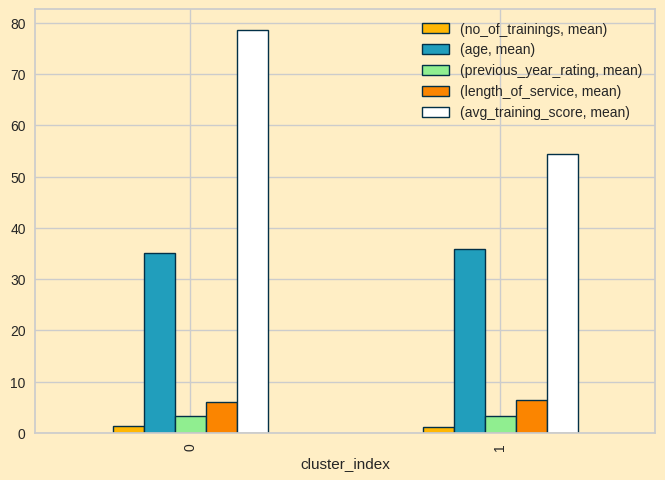

In [ ]:
col_for_cluster = ['cluster_index','no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
cluster_df = df_cluster[col_for_cluster]
cluster_summary = cluster_df.groupby('cluster_index').agg(['mean'])
print(cluster_summary)
cluster_summary.plot(kind='bar', color=colors, edgecolor=colors[-1], linewidth=1, label=[col for col,_ in cluster_summary.columns])
plt.legend()

              no_of_trainings               age                 \
                          min      mean max min       mean max   
cluster_index                                                    
0                           1  1.302426   9  20  35.031867  60   
1                           1  1.213225  10  20  35.909036  60   

              previous_year_rating                length_of_service            \
                               min      mean  max               min      mean   
cluster_index                                                                   
0                              1.0  3.352796  5.0                 1  6.106086   
1                              1.0  3.339381  5.0                 1  6.385412   

                  avg_training_score                 
              max                min       mean max  
cluster_index                                        
0              34                 67  78.643503  99  
1              34                 39  54.468826

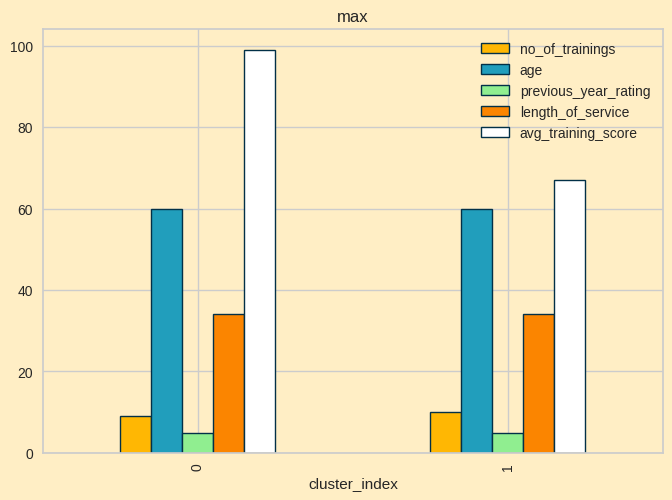

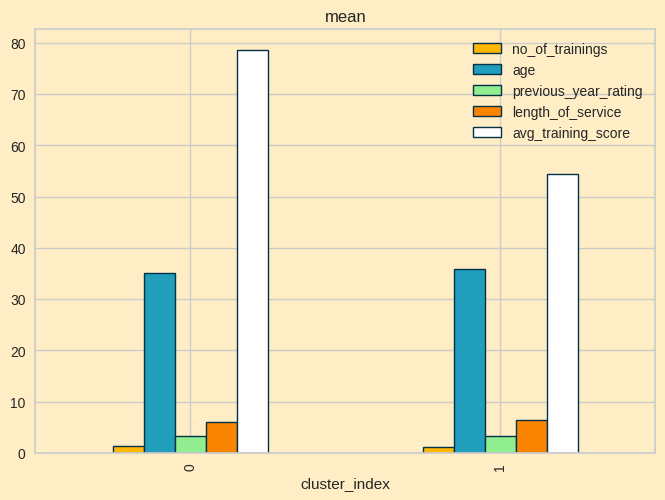

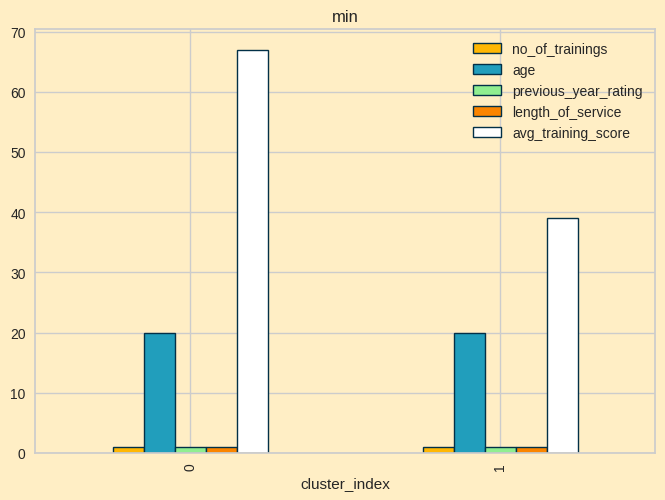

In [ ]:
col_for_cluster = ['cluster_index','no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']
cluster_df = df_cluster[col_for_cluster]
cluster_summary = cluster_df.groupby('cluster_index').agg(['min','mean','max'])
print(cluster_summary)
for stat in ['max','mean','min']:
  cluster_summary.xs(stat, level=1, axis=1).plot(kind='bar', color=colors, edgecolor=colors[-1], linewidth=1, title=stat)
  plt.legend()
  plt.show()

In [ ]:
df_cluster.groupby('cluster_index')['is_promoted'].value_counts()

cluster_index  is_promoted
0              0              4418
               1               446
1              0              8102
               1               110
Name: count, dtype: int64

Conclusion:
- Overfitting occured on LogR and SVM models because of imbalanced data.
- Tested on 6 models, lightgbm is the fittest.
- 429 people (3.3%) of all employees predicted will get promoted in 2024.
- Education level and department have important role in determining promotion.
- Based on promotion, the most accomplished departments are Sales & Marketing, Operations, and Procurement.
- Bachelors got the most promoted employees by number, and Masters & Above by percentage. Note that no Below Secondary employees got promoted.
- Recruitment Channel has important role in determining promotion. Other is the most by number, and Referred by percentage (4.55%).
- Promotion distribution by gender relatively even.

Recommendation:
- Use hyperparameter tuning or other resampling method.
- Employees' performance can be improved by conducting training, Below Secondary employees need to be the focus.